# 1. Spend 20-minutes reading and interacting with the CNN explainer website.

CNN is an algorithm used to recognize patterns in data with a special layer called convolutional layer

CNN basic building block:
* **Tensor**: In CNN above, tensors will be 3-dimensional with the exception of the output layer. (NN = n-dimensional matrix)
* **Neuron**: function that takes in multiple inputs and yields a single output.
* **Layer**:a collection of neurons with the same operation, including the same hyperparameters.
* **Kernel weights and biases**: unique to each neuron & are tuned during the training phase. This allow the classifier to adapt to the problem and dataset provided.
* A CNN conveys a **differentiable score function**, which is represented as class scores in the visualization on the output layer.

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

If according to the function above,

CNN is an algorithm that consist of convolutional layer which includes the hyperparameters of padding,kernel size, Stride.

The CNN also utilize activation function (sigmoid=binary, softmax=multiclass)

and also Pooling layers which gradually decreasing the spatial extent of the network, which reduces the parameters and overall computation of the network. (Tiny VGG or MaxPooling)

Depending on the use case, sometimes the flatten layer is required to converts a three-dimensional layer in the network into a one-dimensional vector to fit the input of a fully-connected layer for classification.

# 2. Play around with the "understanding hyperparameters" section in the CNN explainer website for 10-minutes.

## What is the kernel size?

Kernel size is filter size, which refers to the dimensions of the sliding window over the input. (filter = total num of classes)

## What is the stride?

indicates how many pixels the kernel should be shifted over at a time.

## How could you adjust each of these in TensorFlow code?

In [ ]:
model_4 = Sequential([
    
  Conv2D(filters=10, # filter is the number of sliding windows going across an input( higher = more complex model)
         kernel_size=3, # the size of sliding window going across an input
         strides=1, # size of the step sliding window takes across an input
         padding="same", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
         
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)

])


edit the parameters

# 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

* 2 diff things = binary classification

In [ ]:
# Importing the needed packages 
import tensorflow as tf
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pathlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Zipped data

In [ ]:
!unzip gdrive/My\ Drive/data/images.zip

Archive:  gdrive/My Drive/data/cat_hamster.zip
  inflating: cat_hamster/01_cat.jpg  
  inflating: cat_hamster/02_cat.jpg  
  inflating: cat_hamster/03_cat.jpg  
  inflating: cat_hamster/04_cat.jpg  
  inflating: cat_hamster/05_cat.jpg  
  inflating: cat_hamster/06_hamster.jpg  
  inflating: cat_hamster/07_hamster.jpg  
  inflating: cat_hamster/08_hamster.jpg  
  inflating: cat_hamster/09_hamster.jpg  
  inflating: cat_hamster/10_hamster.jpg  


In [ ]:
!unzip gdrive/My\ Drive/data/images.zip > /dev/null

replace cat_hamster/01_cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/02_cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/03_cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/04_cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/05_cat.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/06_hamster.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/07_hamster.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/08_hamster.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/09_hamster.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace cat_hamster/10_hamster.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


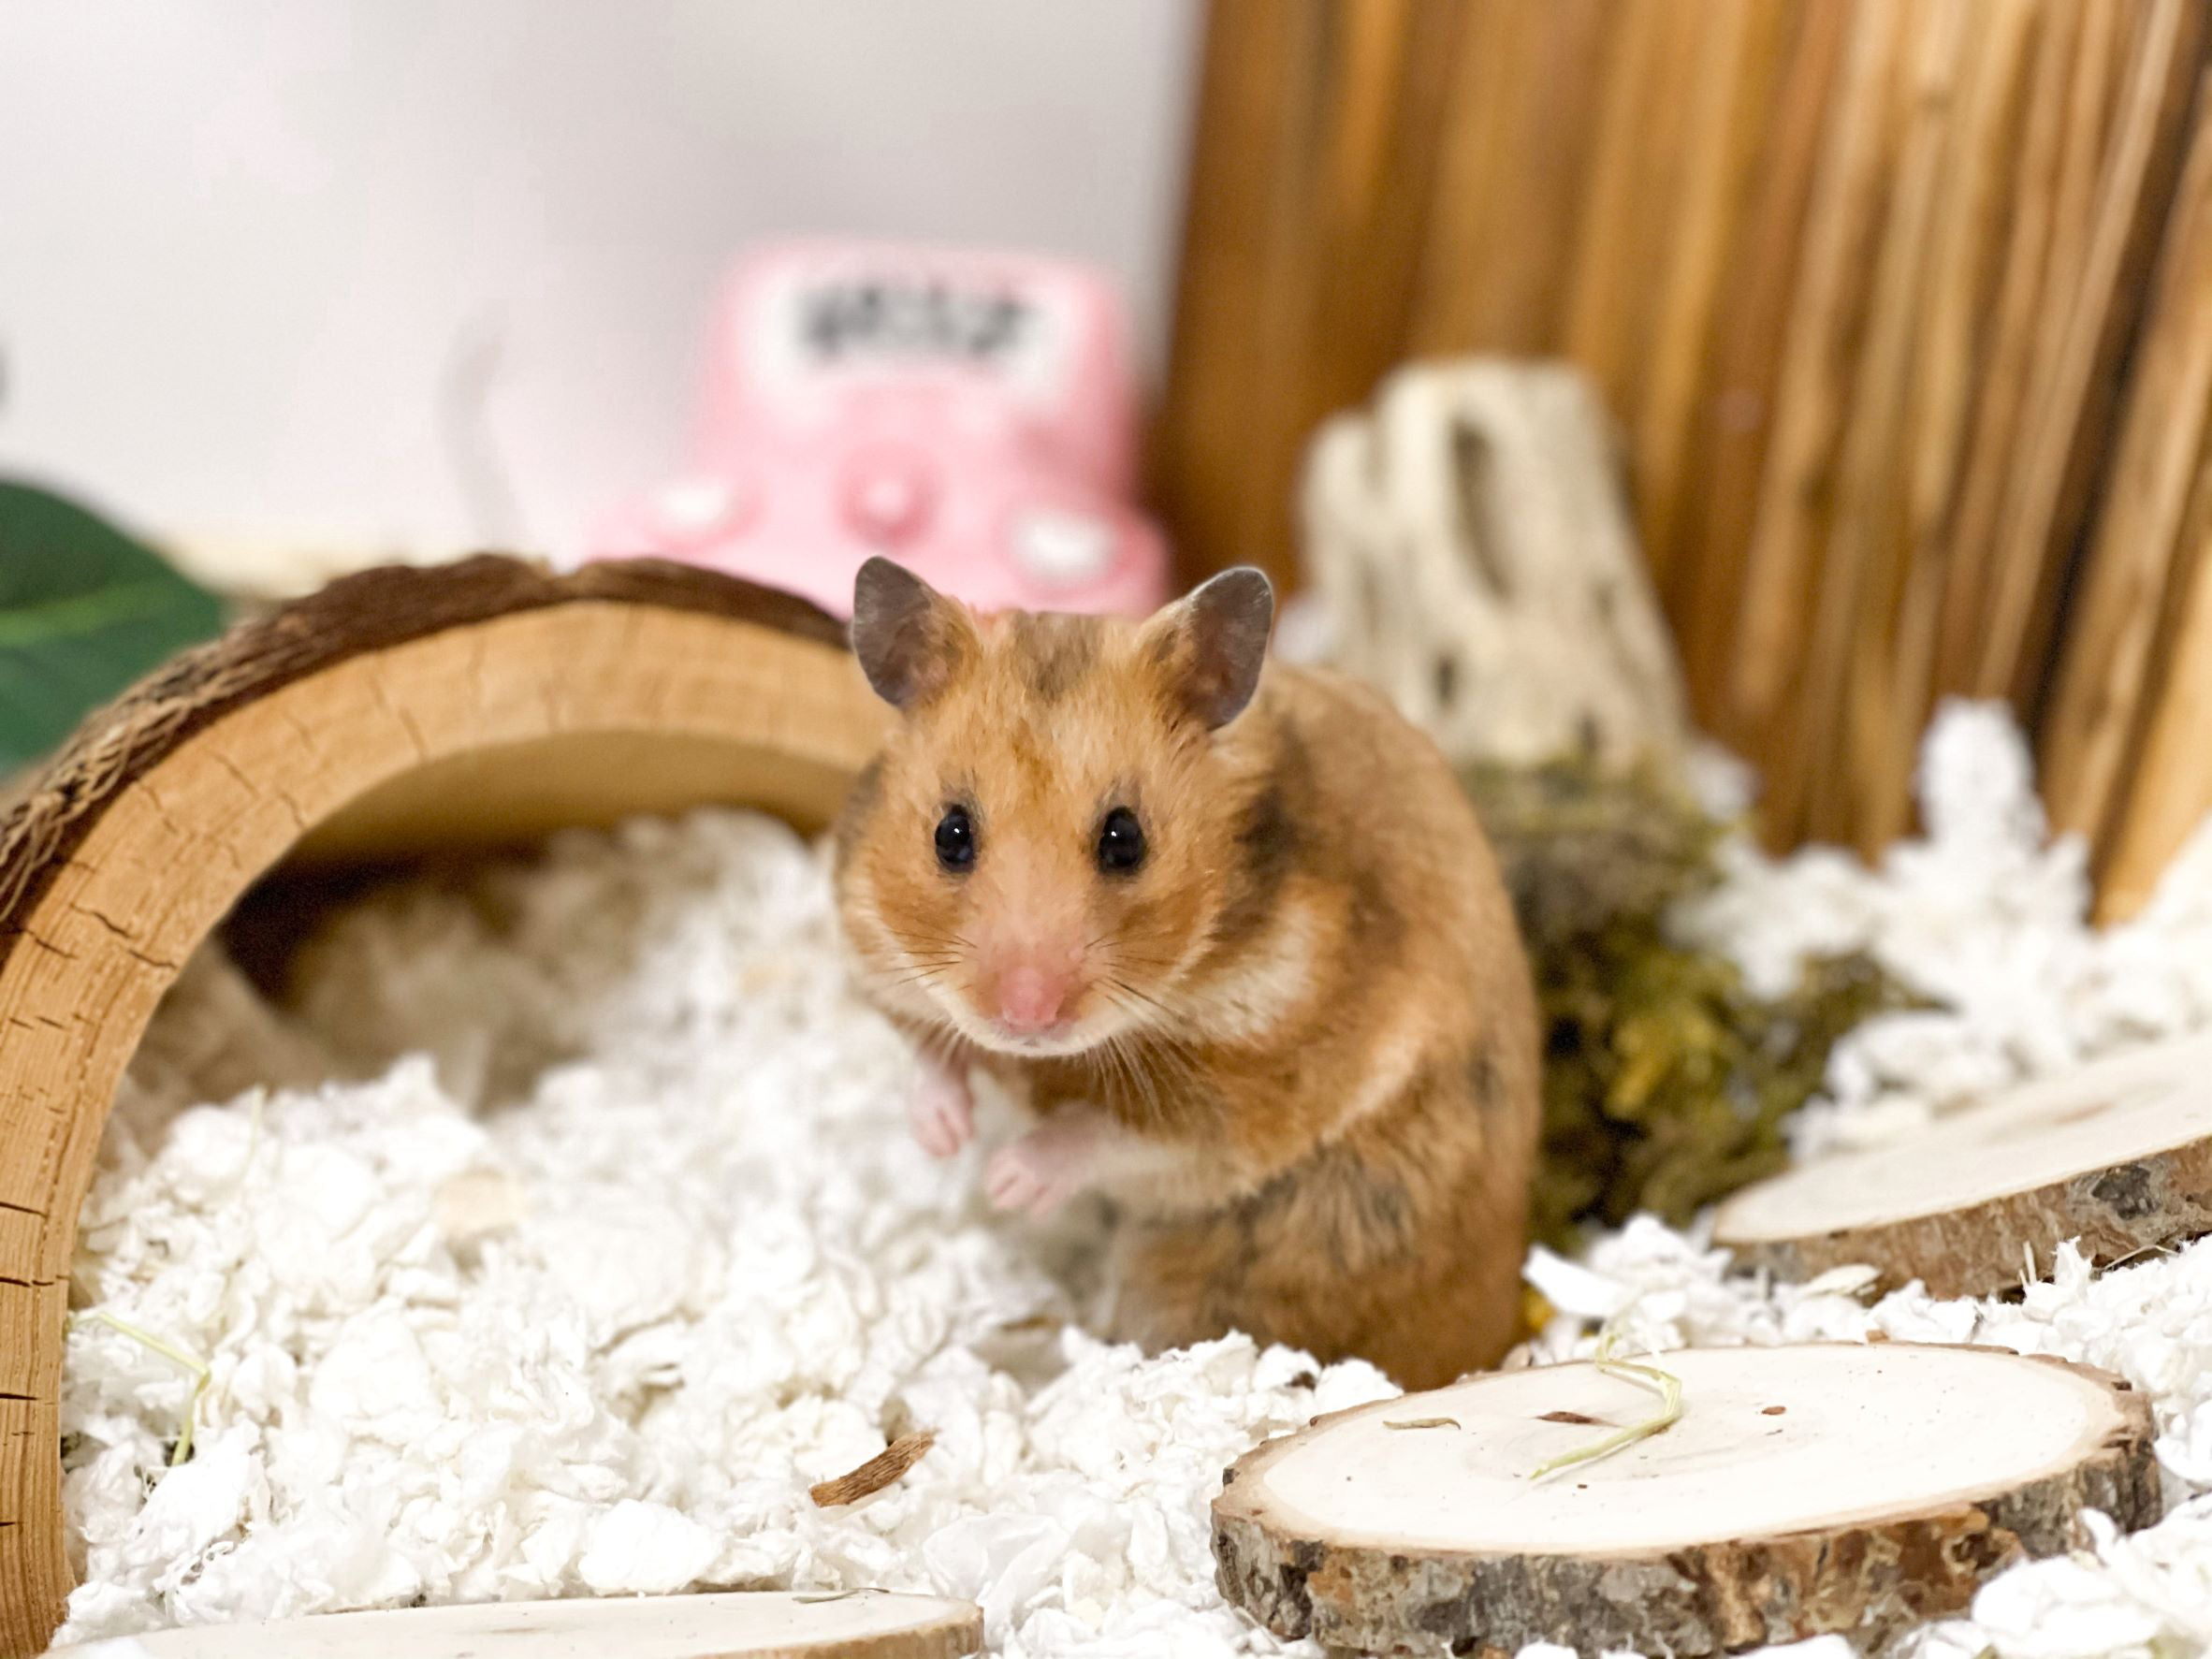

In [ ]:
# test image
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('images/hamster/06_hamster.jpg')
img

## Non zipped data

In [ ]:
# Getting the data path 
#data_dir = 'drive/MyDrive/data/images'
train_path = 'drive/MyDrive/data/images/train'
test_path = 'drive/MyDrive/data/images/test'

In [ ]:
# Let's get class names
data_dir = pathlib.Path(train_path)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cat' 'hamster']


Build CNN

In [ ]:
import tensorflow as tf
# Using ImageDataGenerators to read in images with labels 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
# Creating a instance of the ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale=1/255.,
                                    validation_split = 0.3) # creating a valid split in the train data


# Grabbing our image file from directories 
train_data = train_datagen.flow_from_directory(data_dir , 
                                               batch_size = 2 , 
                                               target_size = (224 , 224), 
                                               class_mode = 'binary', 
                                               seed = 42 , 
                                               subset = 'training')

valid_data = train_datagen.flow_from_directory(data_dir , 
                                               batch_size = 2 , 
                                               target_size = (224, 224) , 
                                               class_mode = 'binary' , 
                                               seed = 42 , 
                                               subset = 'validation')




Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


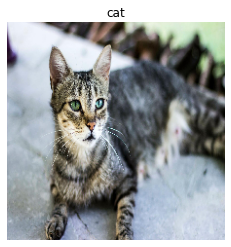

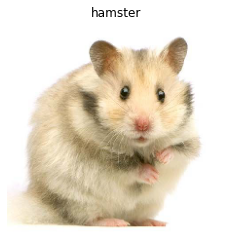

In [ ]:
# Let's do a simple visualization (checking purpose)
x , y  = train_data.next()
for i in range(2):
  image = x[i]
  label = y[i]
  plt.axis(False)
  # print(label) --> for checking whether it's plotting right ones
  if label == 1.0:
    label = 'hamster'
  else:
    label = 'cat'
  plt.title(label)
  plt.imshow(image)
  plt.show()

In [ ]:
x.shape

(2, 224, 224, 3)

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Build a CNN model (same as Tiny VGG on CNN explainer website)
model = tf.keras.models.Sequential([
    Conv2D(filters=2, 
         kernel_size=1, 
         activation="relu",
         input_shape=(224, 224, 3)),

    MaxPool2D(pool_size= 1 , 
                   padding = 'valid'),
    Conv2D(2, 1, activation="relu"),
    MaxPool2D(1 , padding = 'valid'),
    Flatten(),
    Dense(1, activation="sigmoid") # output laye
])

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 224, 224, 2)       8         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 224, 224, 2)      0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 224, 224, 2)       6         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 224, 224, 2)      0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_11 (Dense)            (None, 1)               

In [ ]:
# Compile our CNN
model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(train_data,
                    epochs=20,
                    validation_data=valid_data)

Epoch 1/20
4/4 [==============================] - 1s 264ms/step - loss: 0.7313 - accuracy: 0.5000 - val_loss: 0.5733 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 1s 114ms/step - loss: 0.6743 - accuracy: 0.7500 - val_loss: 1.0772 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 1s 121ms/step - loss: 0.4807 - accuracy: 0.8750 - val_loss: 0.6356 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 1s 176ms/step - loss: 0.2256 - accuracy: 1.0000 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 1s 172ms/step - loss: 0.2137 - accuracy: 1.0000 - val_loss: 0.7091 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 1s 130ms/step - loss: 0.1381 - accuracy: 1.0000 - val_loss: 0.7761 - val_accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 1s 128ms/step - loss: 0.1452 - accuracy: 1.0000 - val_loss: 0.7745 - val_accuracy: 0.5000
Epoch 8/20
4/4 [====

# 4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

In [ ]:
# Lets import learning rate scheduler 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
# Again fitting the same model but with our lr scheduler 

from tensorflow.keras import layers 

lr_model = tf.keras.Sequential([
  layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (224 , 224, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

# Compiling the model
lr_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

# Fit the model 
lr_history = lr_model.fit(train_data , 
                    epochs = 10 , 
                    validation_data = valid_data  , 
                    callbacks = [lr_scheduler])

Epoch 1/10
4/4 [==============================] - 1s 256ms/step - loss: 0.6932 - accuracy: 0.3750 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/10
4/4 [==============================] - 1s 169ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/10
4/4 [==============================] - 1s 123ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/10
4/4 [==============================] - 1s 178ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/10
4/4 [==============================] - 1s 164ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/10
4/4 [==============================] - 1s 183ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/10
4/4 [==============================] - 1s 162ms

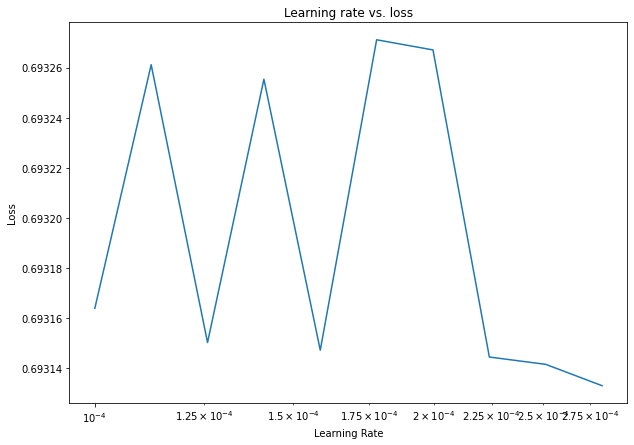

In [ ]:
# Plot the learning rate versus the loss (to figure out where is the inflection point)
lrs = 1e-4 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, lr_history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
# Our learning rate from the graph above 
lr = 2 * 1e-4
lr



0.0002

In [ ]:
# Again fitting the same model but with our lr scheduler 

from tensorflow.keras import layers 

lr_model = tf.keras.Sequential([
  layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' , 
                input_shape = (224 , 224, 3)),

  layers.MaxPool2D(pool_size= 1 , 
                   padding = 'valid'), 
   layers.Conv2D(filters = 2 , kernel_size = 1 , 
                activation = 'relu' ),
  layers.MaxPool2D(1 , padding= 'valid'),
  layers.Flatten(),
  layers.Dense(1 , activation= 'sigmoid')

])

# Compiling the model
lr_model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam(learning_rate = lr) , 
              metrics = ['accuracy'])

# Fit the model 
lr_history = lr_model.fit(train_data , 
                    epochs = 10 , 
                    validation_data = valid_data)

Epoch 1/10
4/4 [==============================] - 1s 260ms/step - loss: 0.9780 - accuracy: 0.2500 - val_loss: 0.7930 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 1s 118ms/step - loss: 0.9062 - accuracy: 0.3750 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 1s 130ms/step - loss: 0.5971 - accuracy: 0.6250 - val_loss: 0.6999 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 1s 164ms/step - loss: 0.4877 - accuracy: 1.0000 - val_loss: 0.7835 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 1s 163ms/step - loss: 0.4795 - accuracy: 1.0000 - val_loss: 0.7547 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 1s 180ms/step - loss: 0.4225 - accuracy: 1.0000 - val_loss: 0.7270 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 1s 162ms/step - loss: 0.3681 - accuracy: 0.8750 - val_loss: 0.6558 - val_accuracy: 1.0000
Epoch 8/10
4/4 [====

# EXTRA: use model with another custom image and see whether it could detect cat/hamster

In [ ]:
class_names

array(['cat', 'hamster'], dtype='<U7')

--2022-11-15 09:04:21--  https://raw.githubusercontent.com/SNNJM/Tensorflow_Deep_Learning/main/03_Tensorflow_CNN/images/01_test_cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292430 (286K) [image/jpeg]
Saving to: ‘01_test_cat.jpg.1’

01_test_cat.jpg.1   100%[===================>] 285.58K  --.-KB/s    in 0.03s   

2022-11-15 09:04:21 (8.42 MB/s) - ‘01_test_cat.jpg.1’ saved [292430/292430]



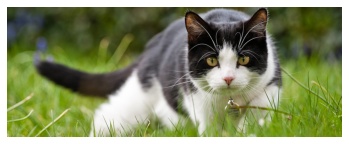

In [ ]:
# View example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/SNNJM/Tensorflow_Deep_Learning/main/03_Tensorflow_CNN/images/01_test_cat.jpg
cat = mpimg.imread("01_test_cat.jpg")
plt.imshow(cat)
plt.axis(False);

In [ ]:
cat.shape

(560, 1440, 3)

In [ ]:
tf.expand_dims(cat, axis=0)

<tf.Tensor: shape=(1, 560, 1440, 3), dtype=uint8, numpy=
array([[[[ 41,  55,  19],
         [ 44,  58,  23],
         [ 41,  55,  20],
         ...,
         [ 41,  44,  27],
         [ 45,  48,  31],
         [ 49,  53,  38]],

        [[ 42,  56,  20],
         [ 45,  59,  24],
         [ 43,  57,  22],
         ...,
         [ 46,  49,  32],
         [ 46,  49,  32],
         [ 44,  48,  33]],

        [[ 40,  54,  18],
         [ 43,  57,  22],
         [ 42,  56,  21],
         ...,
         [ 48,  51,  34],
         [ 47,  51,  34],
         [ 45,  49,  34]],

        ...,

        [[120, 152,  29],
         [129, 150,  21],
         [202, 195, 114],
         ...,
         [120, 149,  21],
         [117, 146,  18],
         [116, 145,  17]],

        [[130, 156,  31],
         [134, 154,  21],
         [201, 196, 112],
         ...,
         [119, 149,  19],
         [116, 145,  17],
         [115, 144,  18]],

        [[133, 152,  27],
         [136, 152,  17],
         [200, 19

In [ ]:
(tf.expand_dims(cat, axis=0)).shape

TensorShape([1, 560, 1440, 3])

In [ ]:
# Create a function to import image and resize it so it can be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, colour_channels)
  """
  # Read in image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values bet 0 and 1)
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
cat = load_and_prep_image("01_test_cat.jpg")
cat

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.15532213, 0.21806723, 0.0757703 ],
        [0.17212886, 0.23487395, 0.08977591],
        [0.18221289, 0.24495798, 0.10378151],
        ...,
        [0.14495707, 0.1600823 , 0.07940961],
        [0.13963552, 0.15924336, 0.08081198],
        [0.16974762, 0.18711512, 0.10980392]],

       [[0.17058824, 0.23333333, 0.09103641],
        [0.16414565, 0.22689074, 0.0817927 ],
        [0.19019608, 0.2529412 , 0.11176471],
        ...,
        [0.15280163, 0.16456634, 0.08557392],
        [0.14285816, 0.162466  , 0.08403464],
        [0.16890654, 0.18795429, 0.10980296]],

       [[0.18221289, 0.24495798, 0.10266107],
        [0.18277311, 0.2514006 , 0.10336135],
        [0.19439776, 0.26288518, 0.1172269 ],
        ...,
        [0.15126163, 0.16302633, 0.08403392],
        [0.15097979, 0.17058764, 0.09215626],
        [0.18865512, 0.20182052, 0.12661037]],

       ...,

       [[0.93543416, 0.88249296, 0.73305315],
        [0.56

In [ ]:
pred = model.predict(tf.expand_dims(cat,axis=0))
pred

1/1 [==============================] - 0s 37ms/step


array([[0.31777012]], dtype=float32)

In [ ]:
# Index the predicted class by rounding the prediction probability and indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'cat'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model 
  and plots the image with the predicted class as the title.
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);



1/1 [==============================] - 0s 22ms/step


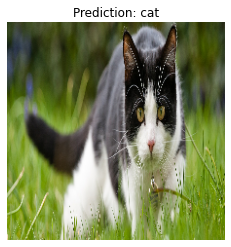

In [ ]:
# Make a prediction using model
pred_and_plot(model=model,
              filename="01_test_cat.jpg",
              class_names=class_names)